<a href="https://colab.research.google.com/github/mehrnazeraeisi/California_Housing/blob/main/Comparison_Chart_CaliforniaH_KnnRegression_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


In [3]:
# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        y_pred = knn_reg.predict(X_feature)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        features_scores.append((feature, r2, mse))  # اضافه شد

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score', 'MSE']).sort_values(by='R2_Score', ascending=False)
    return df_scores



In [4]:
# بارگذاری داده‌های قیمت خانه‌های کالیفرنیا
data =  fetch_california_housing()
X_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data= data.target
data_features = data.feature_names

In [5]:
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Diabetes dataset):")
print(data_scores)  # Categorize features by R² score

🔎 Feature Group Performance Summary (Diabetes dataset):
      Feature  R2_Score       MSE
0      MedInc  0.576552  0.563843
2    AveRooms  0.328928  0.893566
5    AveOccup  0.263637  0.980505
3   AveBedrms  0.174917  1.098639
4  Population  0.036269  1.283256
7   Longitude  0.012794  1.314514
1    HouseAge -0.131907  1.507191
6    Latitude -0.135675  1.512209


In [6]:
# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.5]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.3)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.2)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.1)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.03)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.01)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > -0.13)]['Feature'].tolist()


In [7]:
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)

In [9]:
# Function to prioritize features based on KNN MSE

def knn_mse(X_data, y_data, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    y_pred = model.predict(X_subset)
    return mean_squared_error(y_data, y_pred)


In [10]:

# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
mse_scores = [knn_mse(X_data, y_data, group) for group in groups]

In [11]:
# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)'],
    'R2_Score': r2_scores,
    'MSE':mse_scores

})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)


📊 Grouped Feature Performance Summary (R² and Accuracy):
                 Feature_Group  R2_Score       MSE
0                 All Features  0.471119  0.704232
1              Strong Features  0.576552  0.563843
2  Medium Features_1 (0.7-0.8)  0.642580  0.475923
3  Medium Features_2 (0.6-0.7)  0.718398  0.374968
4  Medium Features_3 (0.5-0.6)  0.725614  0.365359
5  Medium Features_4 (0.4-0.5)  0.608051  0.521900
6  Medium Features_5 (0.3-0.4)  0.586025  0.551229
7  Medium Features_6 (0.2-0.3)  0.586025  0.551229


In [14]:

def knn_evaluation(X_data, y_data,medium_features_3,  data_features, test_size, n_repeats):
    # Initialize lists to store the results

    mse_scores = {
    "all_features": [],
    "medium_features_3": []
    }

    r2_scores = {
        "all_features": [],
        "medium_features_3": []
    }


    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_3": medium_features_3
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred_reg))



    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()

    # MSE plot
    plt.figure(figsize=(8, 4))
    for group_name, mse_list in mse_scores.items():
        plt.plot(x, mse_list, label=f"{group_name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel('Repeat')
    plt.ylabel('Mean Squared Error')
    plt.title('KNN Regressor MSE Performance')
    plt.legend()
    plt.show()


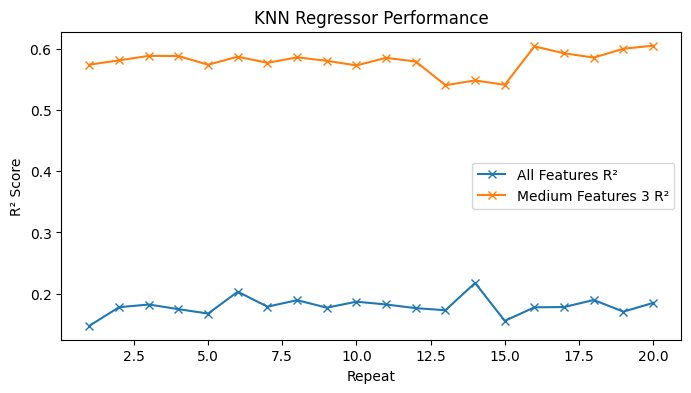

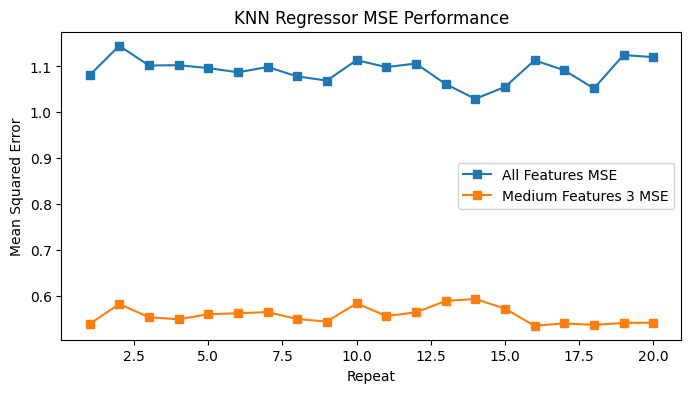

In [15]:

# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size=0.1, n_repeats=20)


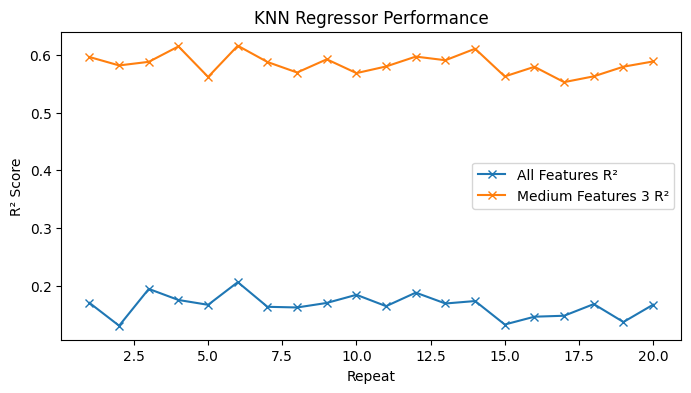

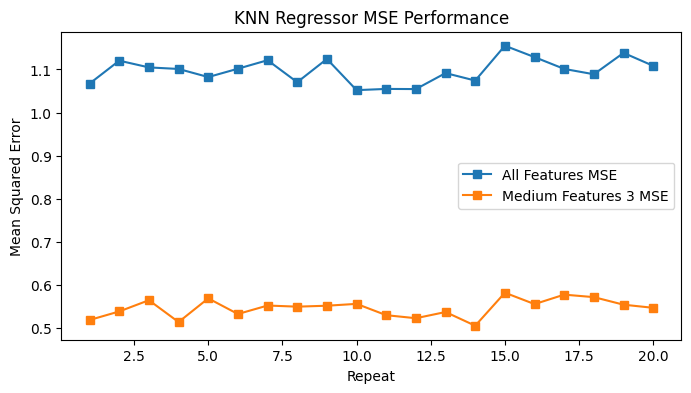

In [16]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_3,  data_features, test_size=0.13, n_repeats=20)


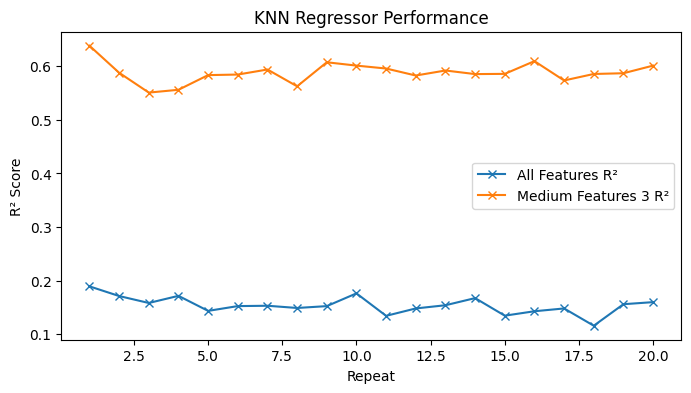

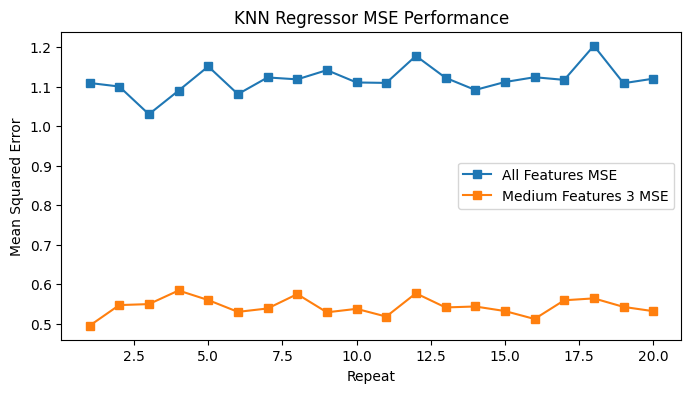

In [17]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size=0.16, n_repeats=20)


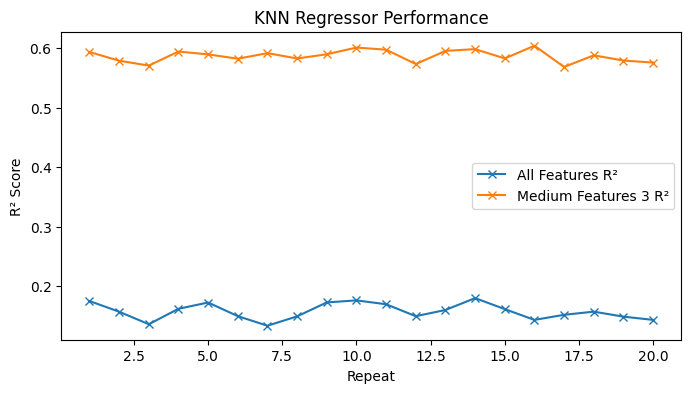

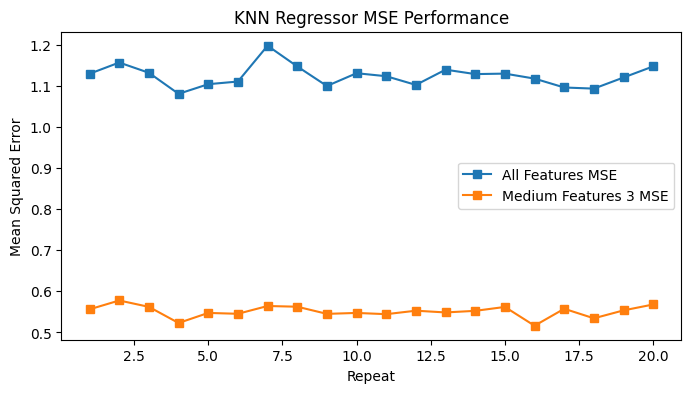

In [18]:
# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size=0.19, n_repeats=20)


🔎 Feature Group Performance Summary (Cancer dataset):
      Feature  R2_Score       MSE
0      MedInc  0.576552  0.563843
2    AveRooms  0.328928  0.893566
5    AveOccup  0.263637  0.980505
3   AveBedrms  0.174917  1.098639
4  Population  0.036269  1.283256
7   Longitude  0.012794  1.314514
1    HouseAge -0.131907  1.507191
6    Latitude -0.135675  1.512209

📊 Grouped Feature Performance Summary (R² and Accuracy):
                 Feature_Group  R2_Score       MSE
0                 All Features  0.471119  0.704232
1              Strong Features  0.576552  0.563843
2  Medium Features_1 (0.7-0.8)  0.642580  0.475923
3  Medium Features_2 (0.6-0.7)  0.718398  0.374968
4  Medium Features_3 (0.5-0.6)  0.725614  0.365359
5  Medium Features_4 (0.4-0.5)  0.608051  0.521900
6  Medium Features_5 (0.3-0.4)  0.586025  0.551229
7  Medium Features_6 (0.2-0.3)  0.586025  0.551229


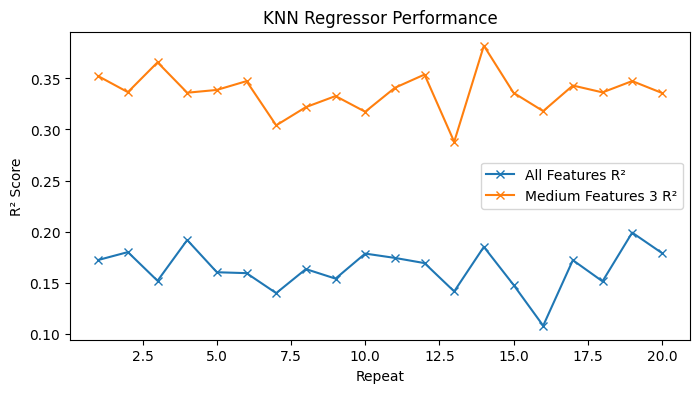

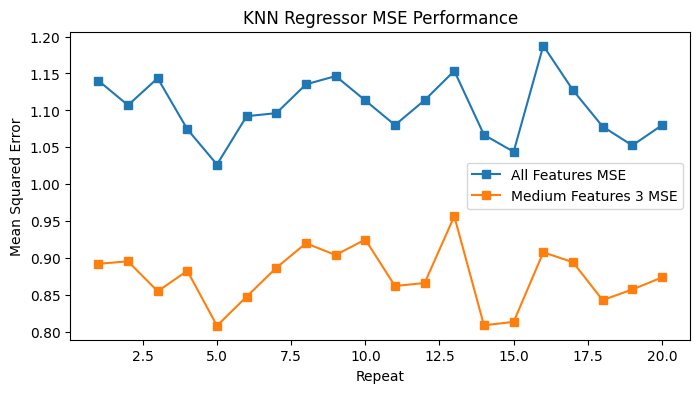

   Percentage Repetition   MSE_All    R2_All  MSE_Modified  R2_Modified
0         10%        n=1  1.158677  0.150958      0.569438     0.582734
1         10%        n=2  1.083134  0.165461      0.541424     0.582841
2         10%        n=3  1.063491  0.204093      0.546239     0.591200
3         10%        n=4  1.064181  0.167256      0.575742     0.549470
4         10%        n=5  1.164858  0.141804      0.601937     0.556529
..        ...        ...       ...       ...           ...          ...
95        25%       n=16  1.125272  0.159372      0.543406     0.594052
96        25%       n=17  1.166921  0.136524      0.549337     0.593512
97        25%       n=18  1.167739  0.120286      0.555570     0.581463
98        25%       n=19  1.125814  0.135886      0.551219     0.576915
99        25%       n=20  1.120791  0.151402      0.544750     0.587547

[100 rows x 6 columns]


In [20]:
#[1]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import train_test_split


# Function to prioritize features based on KNN R² score
def features_prioritization(X, y, features):
    features_scores = []
    knn_reg = KNeighborsRegressor()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D
        knn_reg.fit(X_feature, y)
        y_pred = knn_reg.predict(X_feature)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        features_scores.append((feature, r2, mse))  # اضافه شد

    df_scores = pd.DataFrame(features_scores, columns=['Feature', 'R2_Score', 'MSE']).sort_values(by='R2_Score', ascending=False)
    return df_scores





# بارگذاری داده‌های قیمت خانه‌های کالیفرنیا
data =  fetch_california_housing()
X_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data= data.target
data_features = data.feature_names

#[5]
# Run feature prioritization for the iris dataset
data_scores = features_prioritization(X_data, y_data, data_features)
print("🔎 Feature Group Performance Summary (Cancer dataset):")
print(data_scores)  # Categorize features by R² score

# Categorizing features by R² score into multiple levels
strong_features = data_scores[data_scores['R2_Score'] > 0.5]['Feature'].tolist()
medium_features_1 = data_scores[(data_scores['R2_Score'] > 0.3)]['Feature'].tolist()
medium_features_2 = data_scores[(data_scores['R2_Score'] > 0.2)]['Feature'].tolist()
medium_features_3 = data_scores[(data_scores['R2_Score'] > 0.1)]['Feature'].tolist()
medium_features_4 = data_scores[(data_scores['R2_Score'] > 0.03)]['Feature'].tolist()
medium_features_5 = data_scores[(data_scores['R2_Score'] > 0.01)]['Feature'].tolist()
medium_features_6 = data_scores[(data_scores['R2_Score'] > -0.13)]['Feature'].tolist()


#[7]
# Function to safely compute KNN R² score for feature group

def knn_score(X_data, y_data, selected_features):
    if len(selected_features) == 0:  # اصلاح این خط
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    return model.score(X_subset, y_data)


# Function to prioritize features based on KNN MSE

def knn_mse(X_data, y_data, selected_features):
    if len(selected_features) == 0:
        return np.nan
    model = KNeighborsRegressor()
    X_subset = X_data[selected_features]
    model.fit(X_subset, y_data)
    y_pred = model.predict(X_subset)
    return mean_squared_error(y_data, y_pred)




#[8]
# Compute R² and accuracy scores for each group
groups = [data_features, strong_features, medium_features_1, medium_features_2, medium_features_3,
          medium_features_4, medium_features_5, medium_features_6 ]

r2_scores = [knn_score(X_data, y_data, group) for group in groups]
mse_scores = [knn_mse(X_data, y_data, group) for group in groups]

# Build summary DataFrame
summary_df = pd.DataFrame({
    'Feature_Group': ['All Features', 'Strong Features', 'Medium Features_1 (0.7-0.8)', 'Medium Features_2 (0.6-0.7)',
                      'Medium Features_3 (0.5-0.6)', 'Medium Features_4 (0.4-0.5)', 'Medium Features_5 (0.3-0.4)',
                      'Medium Features_6 (0.2-0.3)'],
    'R2_Score': r2_scores,
    'MSE':mse_scores

})

print("\n📊 Grouped Feature Performance Summary (R² and Accuracy):")
print(summary_df)




def knn_evaluation(X_data, y_data, medium_features_3, data_features, test_size, n_repeats):
    # Initialize lists to store the results

    mse_scores = {
        "all_features": [],
        "medium_features_3": []
    }


    r2_scores = {
        "all_features": [],
        "medium_features_3": [],
    }

    # List of feature groups to evaluate
    feature_groups = {
        "all_features": data_features,
        "medium_features_3": medium_features_3,
    }

    # Repeat the process n_repeats times with different train-test splits
    for _ in range(n_repeats):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            # KNN Regressor
            knn_reg = KNeighborsRegressor(n_neighbors=5)
            knn_reg.fit(X_train[group_features], y_train)
            y_pred_reg = knn_reg.predict(X_test[group_features])
            r2_scores[group_name].append(r2_score(y_test, y_pred_reg))
            mse_scores[group_name].append(mean_squared_error(y_test, y_pred_reg))

    # Plot results for R² and Accuracy
    x = np.arange(1, n_repeats + 1)


    # R² plot
    plt.figure( figsize=(8, 4))
    for group_name, r2_list in r2_scores.items():
        plt.plot(x, r2_list, label=f"{group_name.replace('_', ' ').title()} R²", marker='x')
    plt.xlabel('Repeat')
    plt.ylabel('R² Score')
    plt.title('KNN Regressor Performance')
    plt.legend()
    plt.show()

    # MSE plot
    plt.figure(figsize=(8, 4))
    for group_name, mse_list in mse_scores.items():
        plt.plot(x, mse_list, label=f"{group_name.replace('_', ' ').title()} MSE", marker='s')
    plt.xlabel('Repeat')
    plt.ylabel('Mean Squared Error')
    plt.title('KNN Regressor MSE Performance')
    plt.legend()
    plt.show()


# Example usage (add this after you load and preprocess your data):
knn_evaluation(X_data, y_data,  medium_features_6, data_features, test_size=0.10, n_repeats=20)



def knn_evaluation_table(X_data, y_data,  medium_features_3, data_features, test_sizes, n_repeats):
    results = []

    feature_groups = {
        "All": data_features,
        "medium_features_3": medium_features_3
    }

    for test_size in test_sizes:
        for i in range(1, n_repeats + 1):
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

            # محاسبه برای همه ویژگی‌ها
            knn_reg_all = KNeighborsRegressor(n_neighbors=5)
            knn_reg_all.fit(X_train[feature_groups["All"]], y_train)
            y_pred_all = knn_reg_all.predict(X_test[feature_groups["All"]])
            mse_all = mean_squared_error(y_test, y_pred_all)
            r2_all = r2_score(y_test, y_pred_all)

            # محاسبه برای ویژگی‌های متوسط
            knn_reg_modified = KNeighborsRegressor(n_neighbors=5)
            knn_reg_modified.fit(X_train[feature_groups["medium_features_3"]], y_train)
            y_pred_modified = knn_reg_modified.predict(X_test[feature_groups["medium_features_3"]])
            mse_modified = mean_squared_error(y_test, y_pred_modified)
            r2_modified = r2_score(y_test, y_pred_modified)

            # ذخیره در لیست
            results.append({
                "Percentage": f"{int(test_size * 100)}%",
                "Repetition": f"n={i}",
                "MSE_All": mse_all,
                "R2_All": r2_all,
                "MSE_Modified": mse_modified,
                "R2_Modified": r2_modified
            })

    # ساخت دیتافریم خروجی
    df_result = pd.DataFrame(results)
    return df_result


# درصدهای تست مختلف
test_sizes = [0.10, 0.13, 0.16, 0.19, 0.25]
n_repeats = 20

# اجرای ارزیابی و دریافت جدول
final_df = knn_evaluation_table(X_data, y_data,  medium_features_3, data_features, test_sizes, n_repeats)

# نمایش جدول
print(final_df)

# (اختیاری) ذخیره جدول در فایل اکسل یا CSV
# final_df.to_csv("knn_results_table.csv", index=False)
